In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from utils import get_project_data
from gee_download import GEELocalDownloader

In [161]:
gt_file, _, gt_date, gt_crs, polygon, bounds = get_project_data(
    "498",
    gt_dir="../assets/data/preprocessed",
    gt_data_bands=list(range(1,6)),
    shapefile_paths=['../assets/data/NHM_projectDekning_AOI_edit2015_V2.shp', 
                    '../assets/data/ALS_projects_Dz_all_norway.shp']
)
print(gt_crs)

reprojecting polygon EPSG:32632 -> EPSG:4326
Polygon before warp [(563899.2011773381, 6755834.658947233), (564514.7199804698, 6755214.08004386), (564521.7800095486, 6755206.170024181), (564817.2599823442, 6754837.180041246)]
bbox before warp [(538395.6051443298, 6732407.033205436), (568185.6051443298, 6756007.033205436)]
Polygon after warp [(10.178980666520447, 60.93241985052788), (10.19012665744311, 60.926749634132015), (10.190254214271604, 60.926677482568046), (10.195579511568397, 60.923317137078094)]
bbox after warp [(9.703842793092072, 60.7253957927164), (10.258106843349504, 60.933251765941094), (9.703842793092072, 60.7253957927164)]
EPSG:25832


In [162]:
polygon

[[(60.93241985052788, 10.178980666520447),
  (60.926749634132015, 10.19012665744311),
  (60.926677482568046, 10.190254214271604),
  (60.923317137078094, 10.195579511568397),
  (60.91745668932947, 10.205308894741096),
  (60.91484768505239, 10.209599365916347),
  (60.914882748377146, 10.210143995821396),
  (60.914513759306054, 10.211236697229667),
  (60.91289311297449, 10.213491552090062),
  (60.91255309827471, 10.213777917795314),
  (60.885380105004145, 10.22410374162356),
  (60.872414058642214, 10.254085543154003),
  (60.87220972719023, 10.253031122005204),
  (60.872208279494025, 10.253032353919387),
  (60.872170243683115, 10.252854975835652),
  (60.8721044866372, 10.252636363622704),
  (60.87202443501962, 10.252438923729999),
  (60.866104524978724, 10.239743582462047),
  (60.86610397613618, 10.239744667751907),
  (60.86602121095996, 10.239586229671731),
  (60.86591868085082, 10.239438812433148),
  (60.865807158126785, 10.239321980429667),
  (60.86568886629384, 10.2392382182886),
  (60

In [163]:
bounds

[[(60.7253957927164, 9.703842793092072),
  (60.933251765941094, 10.258106843349504)]]

In [ ]:
9.703842793091395  9.703842793092072

In [156]:
[list(gt_file.bounds)]

[[538395.6051443298, 6732407.033205436, 568185.6051443298, 6756007.033205436]]

## Strategy 1: to list

The GT crs is not recognized by `ee`. We reproject the polygon to `EPSG:4326`. Then in the warping function we will have to go from `EPSG:4326` to `gt_crs`.

In [4]:
gt_file, _, gt_date, gt_crs, polygon, _ = get_project_data(
    "498",
    gt_dir="../assets/data/preprocessed",
    gt_data_bands=list(range(1,6)),
    shapefile_paths=['../assets/data/NHM_projectDekning_AOI_edit2015_V2.shp', 
                    '../assets/data/ALS_projects_Dz_all_norway.shp']
)
print(gt_crs)

reprojecting polygon EPSG:32632 -> EPSG:4326
EPSG:25832


In [5]:
geedl = GEELocalDownloader(
    "../token.json", 
    "../credentials.json",
    ["https://www.googleapis.com/auth/drive"],<
    "ee-walteliot",
    verbose=True
)

Connecting to google drive...
Trying token in ../token.json...
Token authorized.
Building service...


In [9]:
geedl.download_timeserie("../gee_data/498", "498", polygon, gt_date, 180)

Creating polygon from 141 edges...
Date filter: 16.07.2016 - 11-07-2017
Found 25 images
[d:164] timestamp: 2023-05-15 13:05:16.258838
Submitting image 498-GEE_COPERNICUS_S2_SR_HARMONIZED-30032017-20170330T105621_20170330T110334_T32VNN, taskId=GEQJYJPJBOMCKJR3V3UGHRIE...
listing file in geeExports
Done downloading file with id 1tYQ4nwboh7b4xBU25LuvNOsVuGf0_Ogc to ../gee_data/498-GEE_COPERNICUS_S2_SR_HARMONIZED-30032017-20170330T105621_20170330T110334_T32VNN.tif
Deleting file with id 1tYQ4nwboh7b4xBU25LuvNOsVuGf0_Ogc
Done downloading file with id 1BDmE1LlHOfXR7l_PuIsHT3_vEdEvDAdv to ../gee_data/498-GEE_COPERNICUS_S2_SR_HARMONIZED--30032017-20170330T105621_20170330T110334_T32VNN.tif
Deleting file with id 1BDmE1LlHOfXR7l_PuIsHT3_vEdEvDAdv
Done downloading file with id 1y9UPG85BLN9-w61cBtJMdBxyqAIO9fYj to ../gee_data/498-GEE_COPERNICUS_S2_SR_HARMONIZED-03042017.tif
Deleting file with id 1y9UPG85BLN9-w61cBtJMdBxyqAIO9fYj
Done downloading file with id 1KyaSgXZKnOTmUbMrdTYMQhA6C_J24Mvp to ../g

KeyboardInterrupt: 

In [141]:
len(polygon[0][1])

2

In [61]:
from pathlib import Path

def reproject_raster(src_path, gt_file):
    src_file = rasterio.open(src_path)
    print(f"Reprojecting {src_path} from {src_file.crs} to {gt_file.crs}")
    print(f"Src file has crs: {src_file.crs}")
    transform, width, height = rasterio.warp.calculate_default_transform(
        src_file.crs, gt_file.crs, src_file.width, src_file.height, *src_file.bounds)
    kwargs = src_file.meta.copy()
    kwargs.update({
        "crs": gt_file.crs,
        "transform": transform,
        "width": gt_file.shape[1],
        "height": gt_file.shape[0]
    })
    dst_path = str(src_path).replace(Path(src_path).stem, Path(src_path).stem+"_reprojected")
    dst_file = rasterio.open(dst_path, "w", **kwargs)
    for i in range(1, src_file.count+1):
        rasterio.warp.reproject(
            source=rasterio.band(src_file, i),
            destination=rasterio.band(dst_file, i),
            src_crs=src_file.crs,
            dst_crs=gt_file.crs,
            resampling=rasterio.warp.Resampling.bilinear
        )
    src_file.close()
    dst_file.close()
    with rasterio.open(dst_path) as f:
        print(f"Dest file has crs: {f.crs}")
        print(f.shape)
reproject_raster("../gee_data/498/498-GEE_COPERNICUS_S2_SR_HARMONIZED-20170330T105621.tif", gt_file)

Reprojecting ../gee_data/498/498-GEE_COPERNICUS_S2_SR_HARMONIZED-20170330T105621.tif from EPSG:4326 to EPSG:25832
Src file has crs: EPSG:4326
Dest file has crs: EPSG:25832
(2360, 2979)


In [85]:
gt_file.bounds, list(gt_file.bounds)

(BoundingBox(left=538395.6051443298, bottom=6732407.033205436, right=568185.6051443298, top=6756007.033205436),
 [538395.6051443298, 6732407.033205436, 568185.6051443298, 6756007.033205436])

[    0  8066 12454]


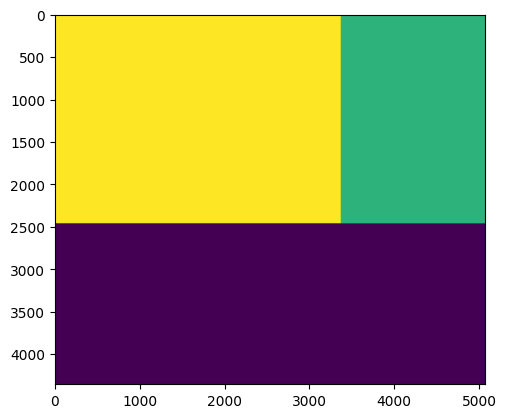

[   0 7726 7859]


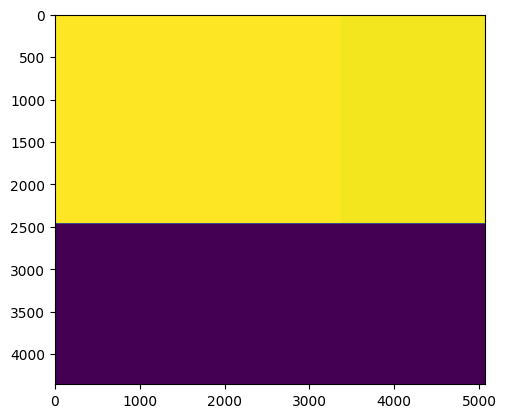

[   0 6777 6854]


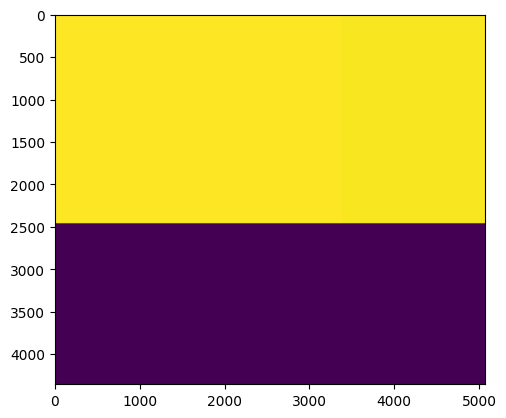

[   0 7086 7095]


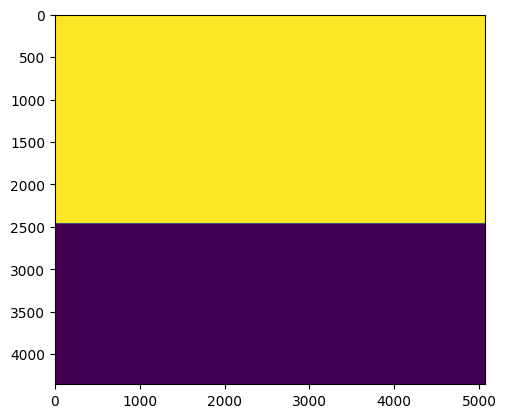

[   0 7039 7179]


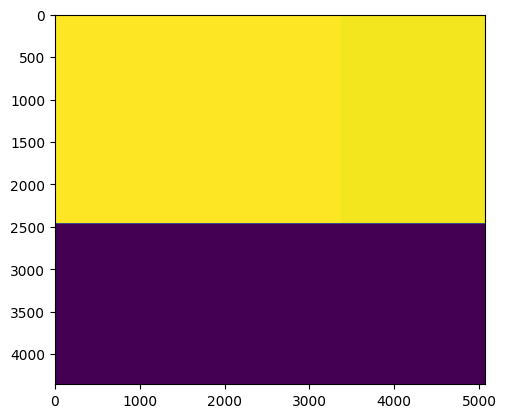

[   0 7015 7144]


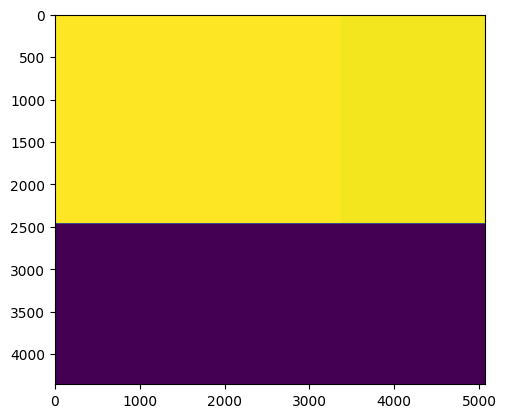

[   0 7022 7029]


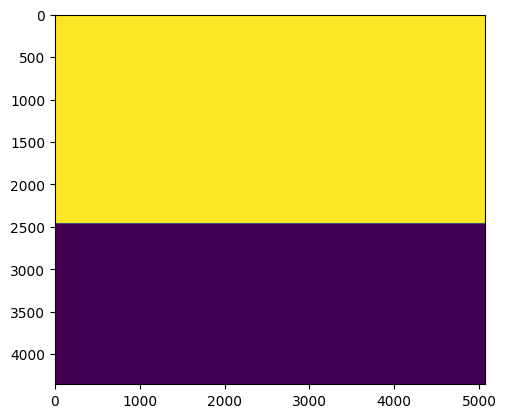

[   0 7452 7649]


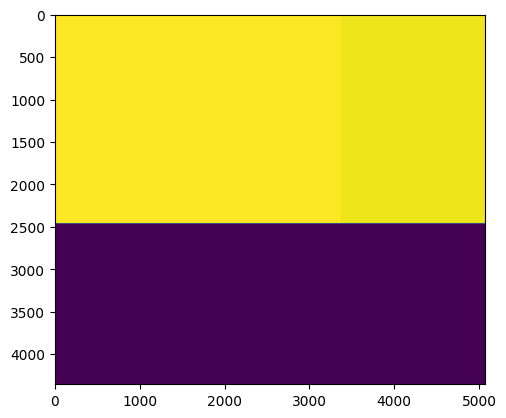

[   0 6874 6951]


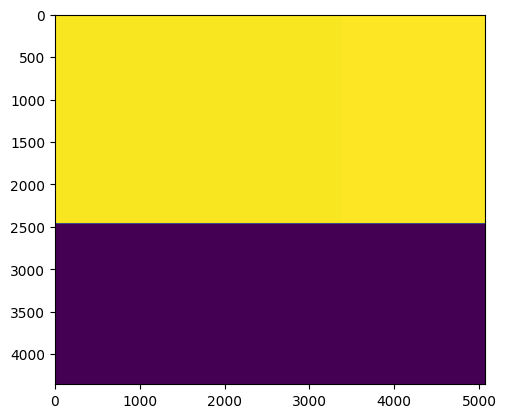

[    0  5245 13235]


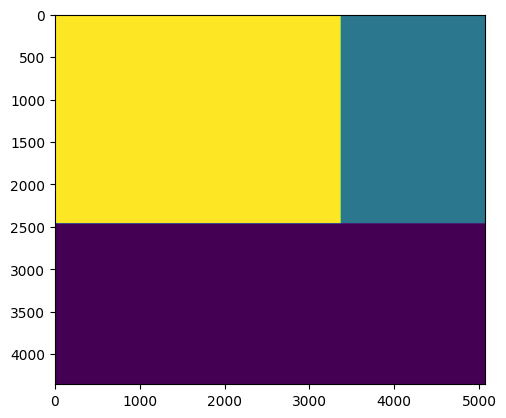

[   0 1818 2543]


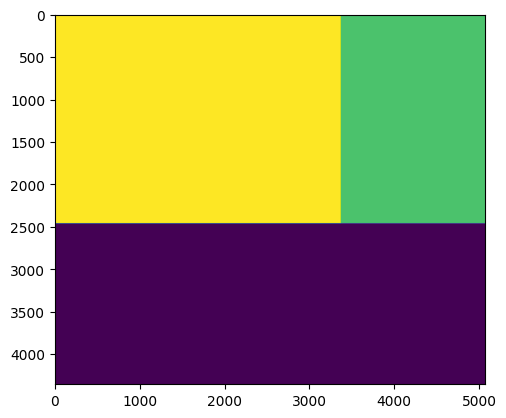

[   0 1852 2648]


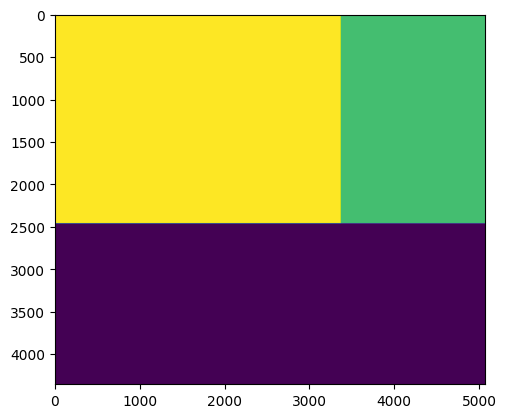

[0]


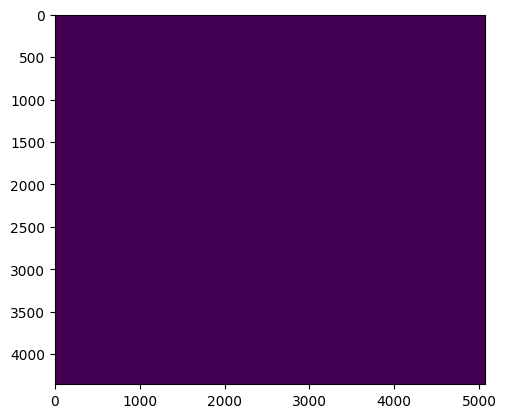

In [166]:
import matplotlib.pyplot as plt
import numpy as np
with rasterio.open("/scratch/ewalt/pdm/rs-uncertainty/gee_data/825/825-GEE_COPERNICUS_S2_SR_HARMONIZED-20180116T105359-20231505T184935.tif") as fh:
    for i in range(1, fh.count+1):
        img = fh.read(i)
        print(np.unique(img))
        plt.imshow(img)
        plt.show()

In [62]:
gt_file.shape, type(gt_file)

[autoreload of gee_download failed: Traceback (most recent call last):
  File "/scratch/ewalt/miniconda3/envs/bfs-3.7/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/scratch/ewalt/miniconda3/envs/bfs-3.7/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 394, in superreload
    module = reload(module)
  File "/scratch/ewalt/miniconda3/envs/bfs-3.7/lib/python3.7/imp.py", line 314, in reload
    return importlib.reload(module)
  File "/scratch/ewalt/miniconda3/envs/bfs-3.7/lib/python3.7/importlib/__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 630, in _exec
  File "<frozen importlib._bootstrap_external>", line 724, in exec_module
  File "<frozen importlib._bootstrap_external>", line 860, in get_code
  File "<frozen importlib._bootstrap_external>", line 791, in source_to_code
  File "<frozen importlib._bootstrap>", line 

((2360, 2979), rasterio.io.DatasetReader)

In [49]:
rasterio.open?

In [44]:
str(gt_crs)

'EPSG:25832'

In [29]:
import rasterio
import rasterio.warp
with rasterio.open("../gee_data/498/498-GEE_COPERNICUS_S2_SR_HARMONIZED-20170330T105621.tif") as rfile:
    print(rfile.crs)
    

EPSG:4326


In [43]:
type(gt_crs)

rasterio.crs.CRS

In [38]:
from datetime import datetime
datetime.now().strftime("%Y%d%mT%H%M%S")

'20231505T153125'

In [96]:
import geetools

In [106]:
fn_prefix = "SomeDumbPrefix"
def rename(feature):
    # cast the 'system:index' as an ee.String and slice the first 4 characters
    sub = (
        ee.String(fn_prefix)
        .cat(ee.String("-"))
        .cat(ee.String(feature.get('system:index')).slice(0, 4+2+2+7))
        .cat(ee.String("-"))
        .cat(ee.String(datetime.now().strftime("%Y%d%mT%H%M%S")))
    )
    return feature.set('system:id', sub)

#map the function
icol = icol.map(rename)

[f["id"] for f in icol.getInfo()["features"]]

['SomeDumbPrefix-20170405T230531-20231505T171913',
 'SomeDumbPrefix-20170405T230531-20231505T171913',
 'SomeDumbPrefix-20170405T230531-20231505T171913',
 'SomeDumbPrefix-20170405T230531-20231505T171913',
 'SomeDumbPrefix-20170408T231711-20231505T171913',
 'SomeDumbPrefix-20170408T231711-20231505T171913',
 'SomeDumbPrefix-20170408T231711-20231505T171913',
 'SomeDumbPrefix-20170408T231711-20231505T171913']

In [150]:
icol = geedl.get_image_collection(polygon, gt_date, 400)

Creating polygon from 141 edges...
Date filter: 09.12.2015 - 16-02-2018
Found 0 images


In [154]:
bds = gt_file.bounds
bds

BoundingBox(left=538395.6051443298, bottom=6732407.033205436, right=568185.6051443298, top=6756007.033205436)

In [ ]:
rectangle_coordinates = [[bds[0], bds[1]], [bds[2], bds[3]]]
rectangle_coordinates = [ee.Geometry.Point()]
icol1 = ee.ImageCollection("COPERNICUS/S2_SR_HARMONIZED").filterBounds()

In [149]:
polygon

[[(60.93241985052788, 10.178980666520447),
  (60.926749634132015, 10.19012665744311),
  (60.926677482568046, 10.190254214271604),
  (60.923317137078094, 10.195579511568397),
  (60.91745668932947, 10.205308894741096),
  (60.91484768505239, 10.209599365916347),
  (60.914882748377146, 10.210143995821396),
  (60.914513759306054, 10.211236697229667),
  (60.91289311297449, 10.213491552090062),
  (60.91255309827471, 10.213777917795314),
  (60.885380105004145, 10.22410374162356),
  (60.872414058642214, 10.254085543154003),
  (60.87220972719023, 10.253031122005204),
  (60.872208279494025, 10.253032353919387),
  (60.872170243683115, 10.252854975835652),
  (60.8721044866372, 10.252636363622704),
  (60.87202443501962, 10.252438923729999),
  (60.866104524978724, 10.239743582462047),
  (60.86610397613618, 10.239744667751907),
  (60.86602121095996, 10.239586229671731),
  (60.86591868085082, 10.239438812433148),
  (60.865807158126785, 10.239321980429667),
  (60.86568886629384, 10.2392382182886),
  (60

In [118]:
geetools.batch.Export.imagecollection.toDrive(
    collection=icol,
    region=ee.Geometry.Rectangle(gt_file.bounds),
    folder="geeExports",
    namePattern=fn_prefix+"-{id}-"+datetime.now().strftime("%Y%d%mT%H%M%S"),
    scale=10,
    dataType="uint16",
    crs="EPSG:4326",
    fileFormat="GeoTIFF",
    maxPixels=1000000000
)

[<Task MGAKEZ35FUAY42LWNTJ3IJTA EXPORT_IMAGE: SomeDumbPrefix-20170405T230531_20170405T230528_T01UBS-20231505T173232 (UNSUBMITTED)>,
 <Task IQSQQ4JEWRFRMMXEM5IHWYKH EXPORT_IMAGE: SomeDumbPrefix-20170405T230531_20170405T230528_T01UBT-20231505T173232 (UNSUBMITTED)>,
 <Task PQLMJW3XLRG26T2SUARIZKZP EXPORT_IMAGE: SomeDumbPrefix-20170405T230531_20170405T230528_T01UBU-20231505T173232 (UNSUBMITTED)>,
 <Task AXPNDHTEA4ULFA25RB5YASDK EXPORT_IMAGE: SomeDumbPrefix-20170405T230531_20170405T230528_T01UBV-20231505T173232 (UNSUBMITTED)>,
 <Task EA64VZKDKLD276GKYOQFCUYD EXPORT_IMAGE: SomeDumbPrefix-20170408T231711_20170408T231708_T01UBS-20231505T173232 (UNSUBMITTED)>,
 <Task J62IFP4UBSX26GVOUBRLTIND EXPORT_IMAGE: SomeDumbPrefix-20170408T231711_20170408T231708_T01UBT-20231505T173232 (UNSUBMITTED)>,
 <Task D7NFC7GXSK7EPT7PW3CUU3A3 EXPORT_IMAGE: SomeDumbPrefix-20170408T231711_20170408T231708_T01UBU-20231505T173232 (UNSUBMITTED)>,
 <Task PA63RAUTF3LSGWAXR64VPRT6 EXPORT_IMAGE: SomeDumbPrefix-20170408T231711

In [117]:
geedl.crs

'EPSG:4326'

In [129]:
icol_mean = icol.mean().toUint16()
t = ee.batch.Export.image.toDrive(
    image=icol_mean,
    region=ee.Geometry.Rectangle(gt_file.bounds, proj="EPSG:25832", geodesic=True, evenOdd=False).transform(ee.Projection("EPSG:4326")),
    folder="geeExports",
    description="498-mean",
    scale=10,
    crs="EPSG:4326"
)
print(t)
t.start()

<Task EXPORT_IMAGE: 498-mean (UNSUBMITTED)>


In [125]:
gt_file.bounds

BoundingBox(left=538395.6051443298, bottom=6732407.033205436, right=568185.6051443298, top=6756007.033205436)

In [127]:
print(gt_file.crs)


EPSG:25832


In [133]:
ee.Geometry.Rectangle(gt_file.bounds, proj="EPSG:25832", geodesic=True, evenOdd=False).transform(ee.Projection("EPSG:4326")),\
ee.Geometry.Rectangle(gt_file.bounds, proj="EPSG:25832", geodesic=True, evenOdd=False).transform(ee.Projection("EPSG:4326")).getInfo()

(ee.Geometry({
   "functionInvocationValue": {
     "functionName": "Geometry.transform",
     "arguments": {
       "geometry": {
         "functionInvocationValue": {
           "functionName": "GeometryConstructors.Rectangle",
           "arguments": {
             "coordinates": {
               "constantValue": [
                 538395.6051443298,
                 6732407.033205436,
                 568185.6051443298,
                 6756007.033205436
               ]
             },
             "crs": {
               "functionInvocationValue": {
                 "functionName": "Projection",
                 "arguments": {
                   "crs": {
                     "constantValue": "EPSG:25832"
                   }
                 }
               }
             },
             "evenOdd": {
               "constantValue": false
             },
             "geodesic": {
               "constantValue": true
             }
           }
         }
       },
       "proj":

In [134]:
gt_file.bounds

BoundingBox(left=538395.6051443298, bottom=6732407.033205436, right=568185.6051443298, top=6756007.033205436)

In [135]:
polygon

[[(10.178980666520447, 60.93241985052788),
  (10.19012665744311, 60.926749634132015),
  (10.190254214271604, 60.926677482568046),
  (10.195579511568397, 60.923317137078094),
  (10.205308894741096, 60.91745668932947),
  (10.209599365916347, 60.91484768505239),
  (10.210143995821396, 60.914882748377146),
  (10.211236697229667, 60.914513759306054),
  (10.213491552090062, 60.91289311297449),
  (10.213777917795314, 60.91255309827471),
  (10.22410374162356, 60.885380105004145),
  (10.254085543154003, 60.872414058642214),
  (10.253031122005204, 60.87220972719023),
  (10.253032353919387, 60.872208279494025),
  (10.252854975835652, 60.872170243683115),
  (10.252636363622704, 60.8721044866372),
  (10.252438923729999, 60.87202443501962),
  (10.239743582462047, 60.866104524978724),
  (10.239744667751907, 60.86610397613618),
  (10.239586229671731, 60.86602121095996),
  (10.239438812433148, 60.86591868085082),
  (10.239321980429667, 60.865807158126785),
  (10.2392382182886, 60.86568886629384),
  (10

In [103]:
geedl.drive.service.files().get(fileId='1tYQ4nwboh7b4xBU25LuvNOsVuGf0_Ogc').execute()["name"]

'498-GEE_COPERNICUS_S2_SR_HARMONIZED-30032017-20170330T105621_20170330T110334_T32VNN.tif'

In [100]:
for file in geedl.drive.listFile(folderName="geeExports"):
    print(file)
    fileId, fileName = file["id"], file["name"]
    geedl.download("../gee_data", fileId=fileId, fileName=fileName)

listing file in geeExports
{'id': '1tYQ4nwboh7b4xBU25LuvNOsVuGf0_Ogc', 'name': '498-GEE_COPERNICUS_S2_SR_HARMONIZED-30032017-20170330T105621_20170330T110334_T32VNN.tif'}
{'id': '1BDmE1LlHOfXR7l_PuIsHT3_vEdEvDAdv', 'name': '498-GEE_COPERNICUS_S2_SR_HARMONIZED--30032017-20170330T105621_20170330T110334_T32VNN.tif'}
{'id': '1y9UPG85BLN9-w61cBtJMdBxyqAIO9fYj', 'name': '498-GEE_COPERNICUS_S2_SR_HARMONIZED-03042017.tif'}
{'id': '1KyaSgXZKnOTmUbMrdTYMQhA6C_J24Mvp', 'name': '498-GEE_COPERNICUS_S2_SR_HARMONIZED-30032017.tif'}
{'id': '1bx83W0B4X4yEnv_ZsWw1H7QkQDXWNI6u', 'name': '498_GEE_S2_SR_HARMONIZED_20170330.tif'}
{'id': '1UR9iA46IgdEkIXlDRw6rqeWBw9QqRCRE', 'name': '498_GEE_S2_SR_HARMONIZED_20170330-0000013056-0000013056.tif'}
{'id': '1-lKk-nRQswOwv6LpbM5PVeWJ54w8c2d5', 'name': '498_GEE_S2_SR_HARMONIZED_20170330-0000013056-0000000000.tif'}
{'id': '1GR5N2JPifguBlmjSqRutTGIpC7A-C4Dz', 'name': '498_GEE_S2_SR_HARMONIZED_20170330-0000000000-0000013056.tif'}
{'id': '1BT-ly3pxXm4RQ3plYkNE3SUSk_TLyRe

In [ ]:
geedl.copy_drive("geeExports", "gee_data", )

In [27]:
fileName = "498-GEE_COPERNICUS_S2_SR_HARMONIZED-20170330T105621.tif"
for file in geedl.drive.listFile("geeExports"):
    if file["name"] == fileName:
        print(file)
        geedl.drive.service.files().delete(fileId=file["id"]).execute()

{'id': '1ULqlCdTinc3gKoEQTsf7M7XpFLAy8QKj', 'name': '498-GEE_COPERNICUS_S2_SR_HARMONIZED-20170330T105621.tif'}


In [21]:
import ee
ee.Initialize(project="ee-walteliot")
tasklist = ee.batch.data.getTaskList()
set([t["state"] for t in tasklist if t["state"]!="CANCELLED"])

{'COMPLETED', 'FAILED'}

In [ ]:
from datetime import timedelta

In [91]:
dir(task), task.name, task.id

(['ExportDestination',
  'State',
  'Type',
  '__class__',
  '__delattr__',
  '__dict__',
  '__dir__',
  '__doc__',
  '__eq__',
  '__format__',
  '__ge__',
  '__getattribute__',
  '__gt__',
  '__hash__',
  '__init__',
  '__init_subclass__',
  '__le__',
  '__lt__',
  '__module__',
  '__ne__',
  '__new__',
  '__reduce__',
  '__reduce_ex__',
  '__repr__',
  '__setattr__',
  '__sizeof__',
  '__str__',
  '__subclasshook__',
  '__weakref__',
  '_request_id',
  'active',
  'cancel',
  'config',
  'id',
  'list',
  'name',
  'start',
  'state',
  'status',
  'task_type',
  'workload_tag'],
 'projects/ee-walteliot/operations/2EXO2X37CYSRWOPPBJG5J77V',
 '2EXO2X37CYSRWOPPBJG5J77V')

In [66]:
image = 
old = ee.Image(icol_list.get(0)).getInfo()["properties"]["system:index"]
ee.Image(icol_list.get(0)).set("system:index", "whatever")
new = ee.Image(icol_list.get(0)).getInfo()["properties"]["system:index"]
ee.Image(icol_list.get(0)).set("system:index", old)
back = ee.Image(icol_list.get(0)).getInfo()["properties"]["system:index"]
print(old, "\n", new, "\n", back)

20170330T105621_20170330T110334_T32VNN 
 20170330T105621_20170330T110334_T32VNN 
 20170330T105621_20170330T110334_T32VNN


In [72]:
icol_renamed = icol.set("filename", [i for i in range(icol.size().getInfo())])
ee.Image(icol_renamed.toList(icol_renamed.size().getInfo()).get(0)).getInfo()["properties"]["filename"]

KeyError: 'filename'

In [71]:
icol_renamed.getInfo()

{'type': 'ImageCollection',
 'bands': [],
 'id': 'COPERNICUS/S2_SR_HARMONIZED',
 'version': 1684139030487666,
 'properties': {'sytem:index': [0,
   1,
   2,
   3,
   4,
   5,
   6,
   7,
   8,
   9,
   10,
   11,
   12,
   13,
   14,
   15,
   16,
   17,
   18,
   19,
   20,
   21,
   22,
   23,
   24],
  'date_range': [1490659200000, 1647907200000],
  'period': 0,
  'system:visualization_0_min': '0.0',
  'type_name': 'ImageCollection',
  'keywords': ['copernicus',
   'esa',
   'eu',
   'msi',
   'reflectance',
   'sentinel',
   'sr'],
  'system:visualization_0_bands': 'B4,B3,B2',
  'thumb': 'https://mw1.google.com/ges/dd/images/COPERNICUS_S2_SR_thumb.png',
  'description': '<p>Sentinel-2 is a wide-swath, high-resolution, multi-spectral\nimaging mission supporting Copernicus Land Monitoring studies,\nincluding the monitoring of vegetation, soil and water cover,\nas well as observation of inland waterways and coastal areas.</p><p>The Sentinel-2 L2 data are downloaded from scihub. They w

In [81]:
# gee->drive loop
for i in range(2):
    image = ee.Image(icol_list.get(i)).toUint16()
    fn = "498-GEE_COPERNICUS_S2_SR_HARMONIZED-{}-{}".format(
        image.date().format("ddMMyyyy").getInfo(),
        image.id().getInfo()
    )
    task = ee.batch.Export.image.toDrive(
        image=image,
        description=fn,
        fileNamePrefix=fn,
        region=aoi.getInfo()["coordinates"],
        crs=projection.getInfo()["crs"],
        crs_transform=projection.getInfo()["transform"],
        folder="geeExports",
        fileFormat="GeoTIFF",
        scale=10
    )
    task.start()

In [83]:
fn, image.getInfo().keys(), image.getInfo()

('498-GEE_COPERNICUS_S2_SR_HARMONIZED-03042017-20170403T104021_20170403T104138_T32VNN',
 dict_keys(['type', 'bands', 'version', 'id', 'properties']),
 {'type': 'Image',
  'bands': [{'id': 'B1',
    'data_type': {'type': 'PixelType',
     'precision': 'int',
     'min': 0,
     'max': 65535},
    'dimensions': [1830, 1830],
    'crs': 'EPSG:32632',
    'crs_transform': [60, 0, 499980, 0, -60, 6800040]},
   {'id': 'B2',
    'data_type': {'type': 'PixelType',
     'precision': 'int',
     'min': 0,
     'max': 65535},
    'dimensions': [10980, 10980],
    'crs': 'EPSG:32632',
    'crs_transform': [10, 0, 499980, 0, -10, 6800040]},
   {'id': 'B3',
    'data_type': {'type': 'PixelType',
     'precision': 'int',
     'min': 0,
     'max': 65535},
    'dimensions': [10980, 10980],
    'crs': 'EPSG:32632',
    'crs_transform': [10, 0, 499980, 0, -10, 6800040]},
   {'id': 'B4',
    'data_type': {'type': 'PixelType',
     'precision': 'int',
     'min': 0,
     'max': 65535},
    'dimensions': [

In [ ]:
# drive->local copy


In [52]:
file = drive.service.files().get(fileId="2EXO2X37CYSRWOPPBJG5J77V").execute()


HttpError: <HttpError 404 when requesting https://www.googleapis.com/drive/v3/files/2EXO2X37CYSRWOPPBJG5J77V?alt=json returned "File not found: 2EXO2X37CYSRWOPPBJG5J77V.". Details: "[{'message': 'File not found: 2EXO2X37CYSRWOPPBJG5J77V.', 'domain': 'global', 'reason': 'notFound', 'location': 'fileId', 'locationType': 'parameter'}]">

In [95]:
ee.data.getTaskList()

[{'state': 'RUNNING',
  'description': '498-GEE_COPERNICUS_S2_SR_HARMONIZED--30032017-20170330T105621_20170330T110334_T32VNN',
  'creation_timestamp_ms': 1684143676069,
  'update_timestamp_ms': 1684143692162,
  'start_timestamp_ms': 1684143689517,
  'task_type': 'EXPORT_IMAGE',
  'attempt': 1,
  'id': '2KQLV3O75RYZIXF66RAJH7OQ',
  'name': 'projects/ee-walteliot/operations/2KQLV3O75RYZIXF66RAJH7OQ'},
 {'state': 'RUNNING',
  'description': '498-GEE_COPERNICUS_S2_SR_HARMONIZED--30032017-20170330T105621_20170330T110334_T32VNN',
  'creation_timestamp_ms': 1684143527513,
  'update_timestamp_ms': 1684143717369,
  'start_timestamp_ms': 1684143536809,
  'task_type': 'EXPORT_IMAGE',
  'attempt': 1,
  'id': 'I4X5K7WLKXYALYIPEJGDK3IV',
  'name': 'projects/ee-walteliot/operations/I4X5K7WLKXYALYIPEJGDK3IV'},
 {'state': 'COMPLETED',
  'description': '498-GEE_COPERNICUS_S2_SR_HARMONIZED-03042017',
  'creation_timestamp_ms': 1684140663460,
  'update_timestamp_ms': 1684141048881,
  'start_timestamp_ms':

In [11]:
# Map rename
def rename_id(x): x.set("system:id", "498-GEE_COPERNICUS_S2_SR_HARMONIZED-{}-{}".format(
    start_date.format("ddMMyyyy"), end_date.format("ddMMyyyy")))
icol.map(rename_id)

EEException: User-defined methods must return a value

In [1]:
import argparse
import yaml
from ee_download_workflow import download_project
from utils import get_project_data

with open("../config/gee/project_timeserie.yaml") as f: 
    cfg = yaml.safe_load(f)

download_project(**cfg, verbose=True)

Go to the following link in your browser:

    https://accounts.google.com/o/oauth2/auth?client_id=%E2%80%9C757499213145-tufpdalliu6ef9s5cdkaet2ra7bfobo8.apps.googleusercontent.com%E2%80%9D&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=%E2%80%9Chttps%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%22&access_type=offline&response_type=code

Enter verification code: 4/1AbUR2VMHv2qobAL5gGblUlynmWwrvoBShsI7192b-tb9UWfFR5GBgHuMjIQ


AuthenticationError: OAuth2 code exchange failed: invalid_clientThe OAuth client was not found.

In [6]:
import ee
ee.Initialize()
import yaml
import time
import rasterio
import rasterio.warp 
import rasterio.features
import fiona
from datetime import datetime, timedelta
import numpy as np
import os
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.set_style("whitegrid")

In [27]:
def pjoin(*subs): return Path(os.path.join(*subs))
def parse_date(date_str) -> datetime: return datetime.strptime(date_str, '%Y%m%d')
def parse_gt_date(date_str) -> datetime: 
    # there are 2 gt date formats
    try: return datetime.strptime(date_str, "%Y-%m-%d")
    except: return datetime.strptime(date_str, "%Y/%m/%d")

# Load project data

- Given paths and projet_id:
    - gt_file
    - gt_labels
    - gt_date
    - polygon
    - bounds
    - gt_crs
    - aoi_df

In [ ]:
class ProjectInfo():
    def __init__(self, gt_file, gt, gt_date, gt_crs, polygon, bounds):
        self.gt_file = gt_file
        self.

In [29]:
def configure(project_id, root="/scratch/ewalt/pdm/rs-uncertainty/"):
    return {
        "project_id": project_id,
        "gt_dir": pjoin(root, "assets/data/preprocessed"),
        "gt_data_bands": [1, 2, 3, 4, 5],
        "shapefile_paths": [
            pjoin(root, p) for p in 
            ['assets/data/NHM_projectDekning_AOI_edit2015_V2.shp', 'assets/data/ALS_projects_Dz_all_norway.shp']
        ],
    }

In [28]:
def get_project_data(
    project_id,
    gt_dir,
    gt_data_bands,
    shapefile_paths,
    return_df=True
):
    # Get gt
    gt_file = rasterio.open(pjoin(gt_dir, project_id+".tif"))
    gt = gt_file.read(gt_data_bands)
    bounds = gt_file.bounds
    # Load shapefiles
    project_shape_collections = [fiona.open(p) for p in shapefile_paths]
    # create the shape ("polygon") associated to the project 
    polygon, gt_crs, gt_date = None, None, None
    for collection in project_shape_collections:
        try:
            polygon = [s['geometry'] for s in collection if s['properties']['kv_id'] == int(project_id)][0]
            crs = collection.crs
            gt_date = [s["properties"]["PUB_DATO"] for s in collection if s['properties']['kv_id'] == int(project_id)][0]
            gt_date = parse_gt_date(gt_date)
            break
        except IndexError: pass 
    if polygon is None: print("No polygon found")
    polygon = rasterio.warp.transform_geom(src_crs=crs, dst_crs=gt_file.crs, geom=polygon)
    return gt_file, gt, gt_date, gt_crs, polygon["coordinates"], bounds

In [30]:
project_id = "498"
gt_file, gt, gt_date, gt_crs, polygon, bounds = get_project_data(**configure(project_id))

In [32]:
bounds.left

538395.6051443298

In [49]:
polygon["type"]

'Polygon'

In [ ]:
def mergeByDate(imgCol):
    '''
    function that merges images together that have the same date. 
    adapted from: https://gis.stackexchange.com/questions/372744/how-to-create-a-loop-which-creates-single-mosaic-images-for-each-day-from-a-sel

    PARAMETERS
    imgCol: [ee.ImageCollection] mandatory value that specifies the image collection to merge by dates with.

    RETURNS 
    ee.ImageCollection where images of the same day are mosaiced together
    '''    
    #Convert the image collection to a list.
    imgList = imgCol.toList(imgCol.size())
    
    # Driver function for mapping the unique dates
    def uniqueDriver(image):
        return ee.Image(image).date().format("YYYY-MM-dd")
    
    uniqueDates = imgList.map(uniqueDriver).distinct()

    # Driver function for mapping the moasiacs
    def mosaicDriver(date):
        date = ee.Date(date)
        
        image = (imgCol
               .filterDate(date, date.advance(1, "day")) #or (date.advance(-1, "day"), date.advance(1, "day"))?
               .mosaic())
        
        return image.set("system:time_start", date.millis(), 
                        "system:date", date.format("YYYY-MM-dd"),
                        "system:id", date.format("YYYY-MM-dd"))
    
    mosaicImgList = uniqueDates.map(mosaicDriver)
    
    return ee.ImageCollection(mosaicImgList)

def download_local(driverfolderid, localdir, start, verbose=False):
    while still_going(start):
        time.sleep(1)
        downloadasgo(drivefolderid, localdir, verbose=verbose)
    downloadasgo(drivefolderid, localdir, verbose=verbose)

def download_image(
    image: ee.Image,
    project_id: str,
):
    # Make filename
    # define task
    # start task
    raise NotImplementedError()

def download_project(
    localdir: str,
    project_id: str,
    polygon: list,
    gt_date: datetime,
    date_offset_amount: int, 
    date_offset_unit: str="day",
    date_offset_policy: str="both", # (before, after, both)
    collection_name: str="COPERNICUS/S2_SR_HARMONIZED",
    s2_bands: list=['B1','B2','B3','B4','B5','B6','B7','B8','B8A', 'B9', 'B11','B12','MSK_CLDPRB'],
    drivefolder: str="geeExports",
    drivefolderid='',
    batch: bool=False, # if false, sequential dl o/w parallel
    agg: str=None, # if None, raw images, o/w compute agg
    mosaic: bool=False, # if True mosaic same dates
    dtye: str="uint16",
    verbose: bool=False,
):
    assert date_offset_policy is ["before", "after", "both"], f'Invalid date_offset_policy: {date_offset_policy}. Value must be in {["before", "after", "both"]}.'
    assert date_offset_amout >= 0, f'date_offset_amount must be positive'
    assert agg in [None, "mean", "median", "cloudless_mean", "cloudless_median"], f'Invalid agg: {agg}. Value must be in {[None, "mean", "median"]}.'
    assert dtype in ["uint16"], f'Invalid dtype: {dtype}. Value must be in {["uint16"]}.'
    # Connect to GDrive
    if not drivefolderid and len(drive.ListFile({'q': "title='{id}'".format(id=drivefolder)}).GetList())==0: 
        file_metadata = {'title': drivefolder,
                            'parents': ['root'],
                            'mimeType': 'application/vnd.google-apps.folder'}
        folder = drive.CreateFile(file_metadata)
        folder.Upload()
        drivefolderid = folder['id']
    elif not drivefolderid: 
        drivefolderid = drive.ListFile({'q': "title='{id}'".format(id=drivefolder)}).GetList()[0]['id']  #version v2 of Google Drive API
    
    # polygon
    aoi = ee.Geometry.Polygon(polygon)
    
    # dates
    gt_date = ee.Date(gt_date)
    if date_offset_policy == "before":
        start_date = gt_date.advance(-date_offset_amount, date_offset_unit)
        end_date = gt_date
    elif date_offset_policy == "after":
        start_date = gt_date
        end_date = gt_date.advance(date_offset_amount, date_offset_unit)
    else:
        start_date = gt_date.advance(-date_offset_amount, date_offset_unit)
        end_date = gt_date.advance(date_offset_amount, date_offset_unit)
    
    # image collection
    icol = (ee.ImageCollection(collection_name)
             .filterBounds(aoi)
             .filterDate(start_date, end_date)
             .select(s2_bands))
    if mosaic:
        icol = MergeByDate(icol)
    if agg is not None:
        if "cloudless" in agg:
            # TODO: cloud masking
            raise NotImplementedError()
        agg_img = eval(f"icol.{agg}()")
        download_img(agg_img)
        download_local(driverfolderid, localdir, datetime.now(), verbose=verbose)
    
    # Download
    else:
        now = datetime.now()
        num_tasks = icol.size().getInfo()
        icol_list = icol.toList(num_tasks)
        # Parallel download
        if batch:
            for image in icol_list: 
                download_image(image)
            download_local(driverfolderid, localdir, datetime.now(), verbose=verbose)
        # Sequential download
        else:
            for image in icol_list: 
                download_image(image)
                download_local(driverfolderid, localdir, datetime.now(), verbose=verbose)

In [37]:
type(polygon["coordinates"])

list

In [57]:
ee.Geometry.Polygon(polygon["coordinates"]).getInfo()["coordinates"]

[[[563899.2011781419, 6755834.658824679],
  [539024.1310164346, 6755178.560310203],
  [539248.8400359971, 6754543.159912221],
  [538865.0969036139, 6753917.5781549355],
  [538897.9524304823, 6749568.097829428],
  [539887.1999744953, 6748411.749972747],
  [541210.2036883761, 6746911.441425804],
  [541475.9200962898, 6746610.10985395],
  [541476.1400709585, 6746609.859871178],
  [542336.7099804848, 6745627.459846377],
  [542355.5400050975, 6745595.549843346],
  [542361.4600328822, 6745558.9698804505],
  [542345.7820769094, 6744955.649179959],
  [542317.7199797049, 6743876.039827059],
  [543839.1000907369, 6743876.039930546],
  [543875.3101077093, 6743869.249920703],
  [543906.6100597142, 6743849.819913843],
  [543928.7400657623, 6743820.369920687],
  [543938.7100632838, 6743784.899846158],
  [543993.8001072792, 6743165.399859212],
  [543994.1801328451, 6743155.069907558],
  [543993.280089667, 6743093.79989065],
  [543845.8999475149, 6733081.109922016],
  [547111.2481775562, 6732607.14491

In [ ]:
538396,6.75601e+06, 538147,6.74546e+06


In [39]:
icol = ee.ImageCollection("COPERNICUS/S2_SR_HARMONIZED")\
    .filterBounds(ee.Geometry.Rectangle([, 0.23, 0.24]))\
    .select(["B"])

In [43]:
icol.getInfo()

{'type': 'ImageCollection',
 'bands': [],
 'id': 'COPERNICUS/S2_SR_HARMONIZED',
 'version': 1683814929787050.0,
 'properties': {'date_range': [1490659200000, 1647907200000],
  'period': 0,
  'system:visualization_0_min': '0.0',
  'type_name': 'ImageCollection',
  'keywords': ['copernicus',
   'esa',
   'eu',
   'msi',
   'reflectance',
   'sentinel',
   'sr'],
  'system:visualization_0_bands': 'B4,B3,B2',
  'thumb': 'https://mw1.google.com/ges/dd/images/COPERNICUS_S2_SR_thumb.png',
  'description': '<p>Sentinel-2 is a wide-swath, high-resolution, multi-spectral\nimaging mission supporting Copernicus Land Monitoring studies,\nincluding the monitoring of vegetation, soil and water cover,\nas well as observation of inland waterways and coastal areas.</p><p>The Sentinel-2 L2 data are downloaded from scihub. They were\ncomputed by running sen2cor. WARNING: ESA did not produce L2 data\nfor all L1 assets, and earlier L2 coverage is not global.</p><p>The assets contain\n12 UINT16 spectral band

In [45]:
icol.size().getInfo()

0

In [47]:
icol.toList(icol.size())

In [52]:
import argparse
args = argparse.Namespace()
args.value = 10
args.root = "usr/"
vars(args)

{'value': 10, 'root': 'usr/'}